In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [15 , 5]
plt.rcParams["font.size"] = 15
%matplotlib inline



In [4]:
train = pd.read_csv(r"../Data/RawData/train.csv")
test = pd.read_csv(r"../Data/RawData/test.csv")

In [5]:
## First lets explore the features first, 

In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# which features are have integer value

["PassengerID" , "Survivied" , "Pclass", "SibSp","Parch" ]

['PassengerID', 'Survivied', 'Pclass', 'SibSp', 'Parch']

In [9]:
# whcih feature are have object dtype

["Name" , "Sex", "Ticket", "Cabin", "Embarked"]

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [10]:
## these features have Float Dtype

["Age", "Fare"]

['Age', 'Fare']

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
## 1. from above desciption we can see that PassengerID is not usefull for our analysis, so we will drop it.
## 2. Age have missing values, we will find if age is imp feature the we have to fill it very carefully.
## 3. we can combine SibSp and Parch with new feature as Family.

In [13]:
train.describe(include = ["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sobey, Mr. Samuel James Hayden",male,1601,B96 B98,S
freq,1,577,7,4,644


In [14]:
f"{round((891 - 681)/891*100 , 2)}" + "%"

'23.57%'

In [15]:
train["Ticket"].value_counts(ascending = False)[:10]

1601            7
CA. 2343        7
347082          7
CA 2144         6
347088          6
3101295         6
S.O.C. 14879    5
382652          5
LINE            4
349909          4
Name: Ticket, dtype: int64

In [16]:
## 1. Cabin have so many missing values so we will drop it.
## 2. Ticket feature have so many duplicate values so we drop this also.
## 3. May be we can do something about Name.
## 4. 

In [17]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [18]:
## in test data we have missing values in Age and Fare, we will with same method as train.

In [19]:
## let's find the correlation with the Survival of the cotegorical features first.

In [20]:
## 1. Pclass
## 2. SibSp 
## 3. Parch
## 4. Sex
## 5. Embarked

## Pclass

In [21]:
train.groupby(["Pclass"] , as_index = False)["Survived"].mean().sort_values(by = "Survived" , ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## *`we can clearly see that Pclass is highly correlated with the Survived, 1st class passengers are more likely to survive.`*

## Sex

In [22]:
train.groupby("Sex" , as_index = False)["Survived"].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


## *`Clearly womens are more likely to survived.`*

## Embarked

In [23]:
train.groupby("Embarked" , as_index = False)["Survived"].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [24]:
## C people are more likely to survive

## Now lets check the Numerical variable feature VS Survived (correlation)

## 1. Age VS Survived

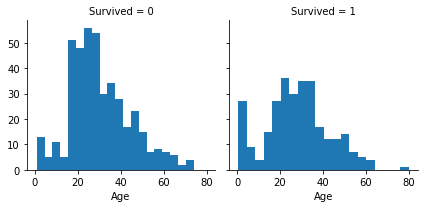

In [29]:
g = sns.FacetGrid(data = train, col = "Survived")
g.map(plt.hist , "Age" , bins = 20)

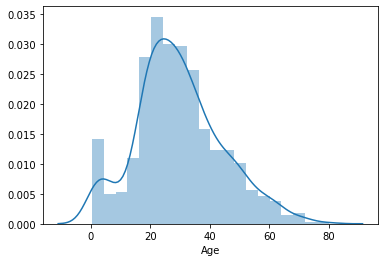

In [37]:
sns.distplot(train["Age"] , bins = 20)

In [ ]:
## 1. from here we can see that less then 4 age childerens are more likely to survive
## 2. 80 year grandpa also made it.
## 3. between age 65 to 76 persons did not survive.
## 4. most people between age 16 to 28 persons did not. 

## 2. Age vs Sex

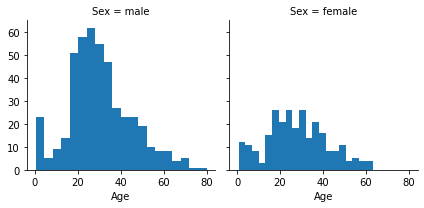

In [39]:
g = sns.FacetGrid(data = train , col = "Sex" )
g.map(plt.hist , "Age", bins = 20)

## there are more males then females.

## 3. Age vs Sex vs Survived

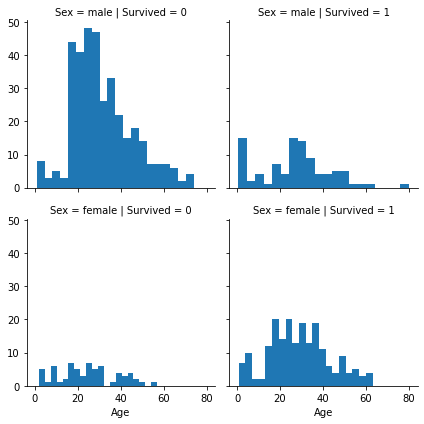

In [43]:
g= sns.FacetGrid(data = train, col = "Survived", row = "Sex")
g.map(plt.hist , "Age" , bins = 20)

In [45]:
## This is not new finding that Males always sacrifice since the titanic era.

## 4. Age vs Survived vs Embarked

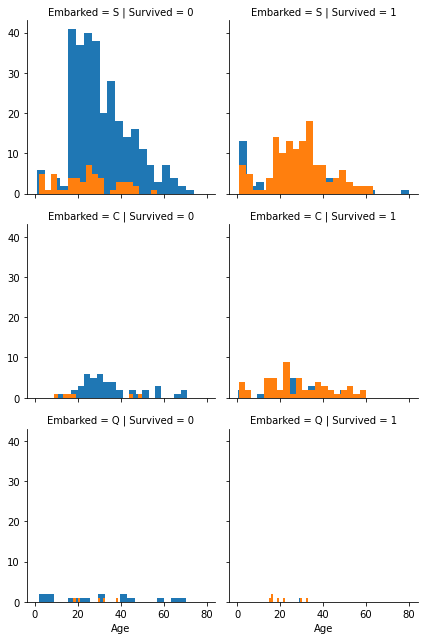

In [52]:
g = sns.FacetGrid(data = train, col = "Survived" , row = "Embarked" , hue = "Sex")
g.map(plt.hist, "Age" , bins = 20)

## 5. Age vs Pclass vs Survived

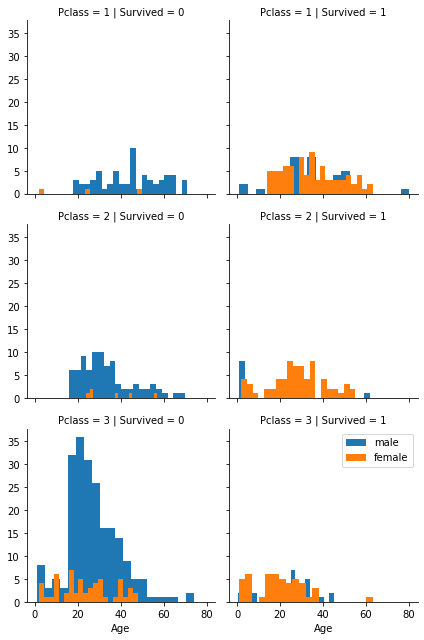

In [51]:
g = sns.FacetGrid(data = train, col = "Survived", row = "Pclass" , hue = "Sex")
g.map(plt.hist , "Age" , bins = 20)
plt.legend()

In [ ]:
## we can clearly see that 1st class persons are more likely to survive, then Pclass 3rd.

## 1. Grandpa survive becaue he was from 1st class
## 2. Every class childeren less then 4 year survived except Pclass 3. that is sad.
## 3. 

## 2. Fare

In [53]:
## lets find which feature have high correlation with Fare.

## 2.1 Fare vs Survived

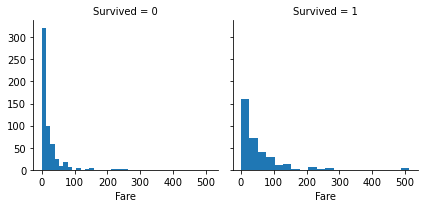

In [60]:
g = sns.FacetGrid(data = train , col = "Survived" )
g.map(plt.hist , "Fare", bins = 20 )


(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

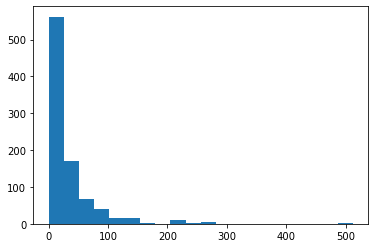

In [65]:
plt.hist(train["Fare"] , bins = 20 , )

In [73]:
print("Total less then 25 person-> " , len(train[train["Fare"] <= 25]))
print("Total Gareeb survived - >" , len(train[(train["Fare"] <= 25) & (train["Survived"]) == 1]))
print("probability of gareeb survived on Titanic ->" , len(train[(train["Fare"] <= 25) & (train["Survived"]) == 1])/len(train[train["Fare"] <= 25]))

Total less then 25 person->  557
Total Gareeb survived - > 160
probability of gareeb survived on Titanic -> 0.2872531418312388


In [ ]:
## 1. most People have less then 25 Fare.
## 2. Only 28 % people less then 25 Fare survive.

## 2.2 Fare vs Pclass

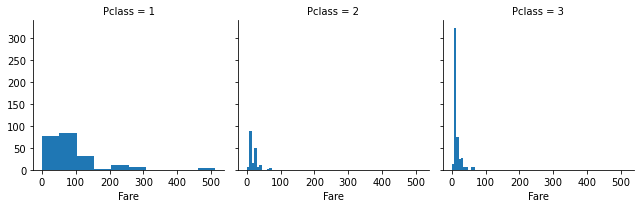

In [74]:
g = sns.FacetGrid(data = train, col = "Pclass")
g.map(plt.hist , "Fare")

In [75]:
## Fare of Pclass 1 is high

## 2.3 Fare vs Embarked

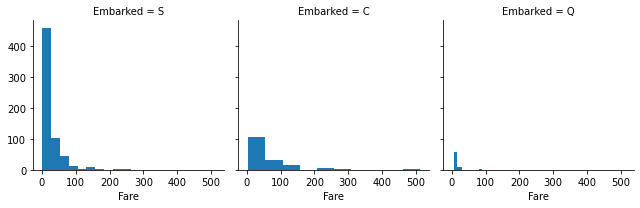

In [76]:
g = sns.FacetGrid(data = train, col = "Embarked")
g.map(plt.hist , "Fare")

In [ ]:
## mostly Gareeb persons are from S Port.

## let's activate level B, say less, do more.😂

In [77]:
## till now we have decied we will drop below Features
## 1. PassengerID
## 2. Cabin
## 3. Ticket